In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [17]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")


In [18]:
X = df.drop(columns=["HeartDiseaseorAttack"])
y = df["HeartDiseaseorAttack"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_model.predict(X_test)


In [22]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.9036778618732261

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.45      0.11      0.18      4768

    accuracy                           0.90     50736
   macro avg       0.68      0.55      0.57     50736
weighted avg       0.87      0.90      0.88     50736

Confusion Matrix:
[[45306   662]
 [ 4225   543]]


In [23]:
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

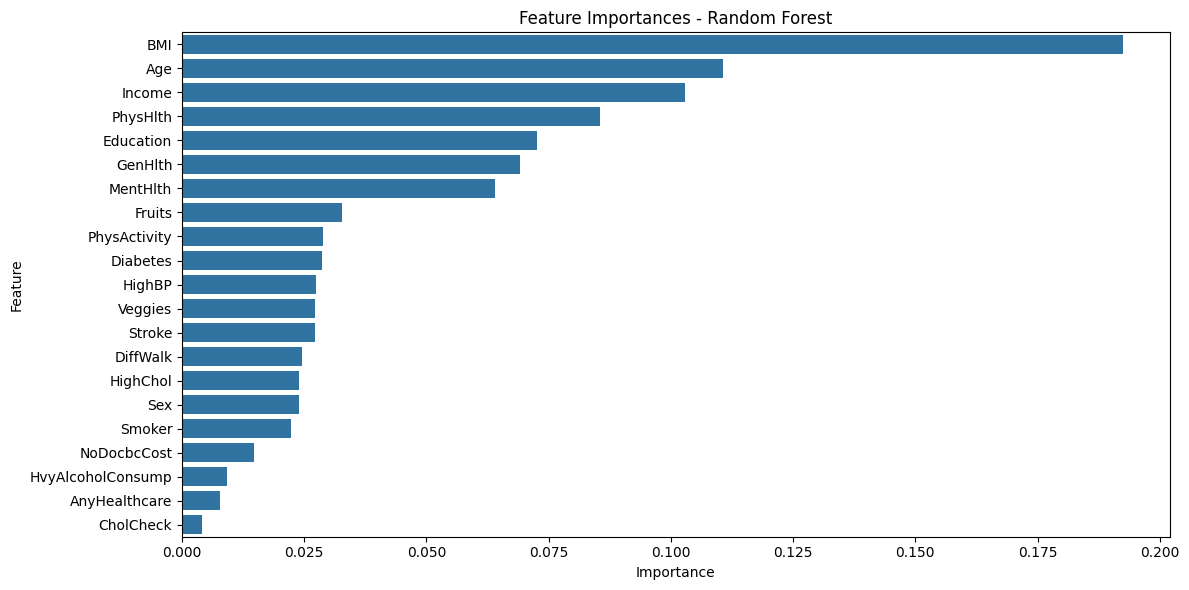

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [25]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

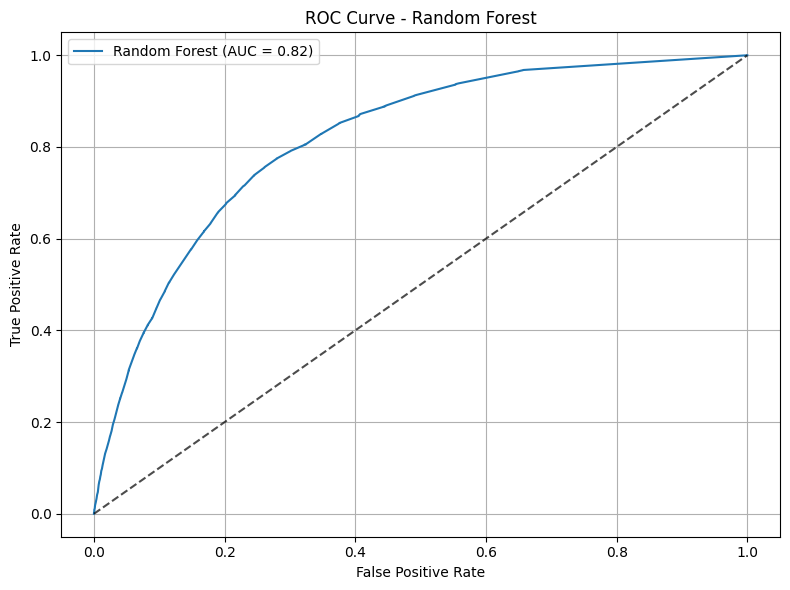

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

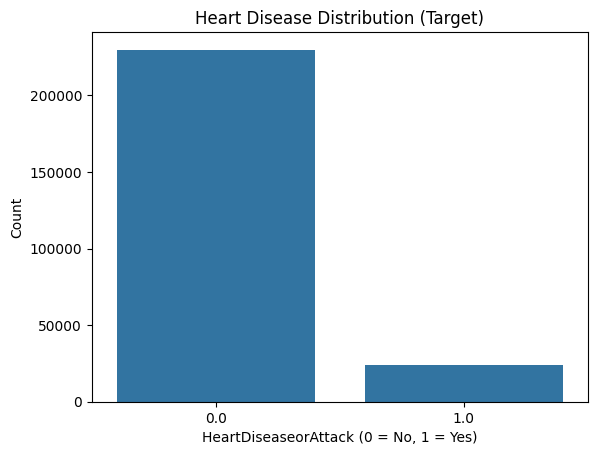

In [27]:
sns.countplot(x=y)
plt.title("Heart Disease Distribution (Target)")
plt.xlabel("HeartDiseaseorAttack (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

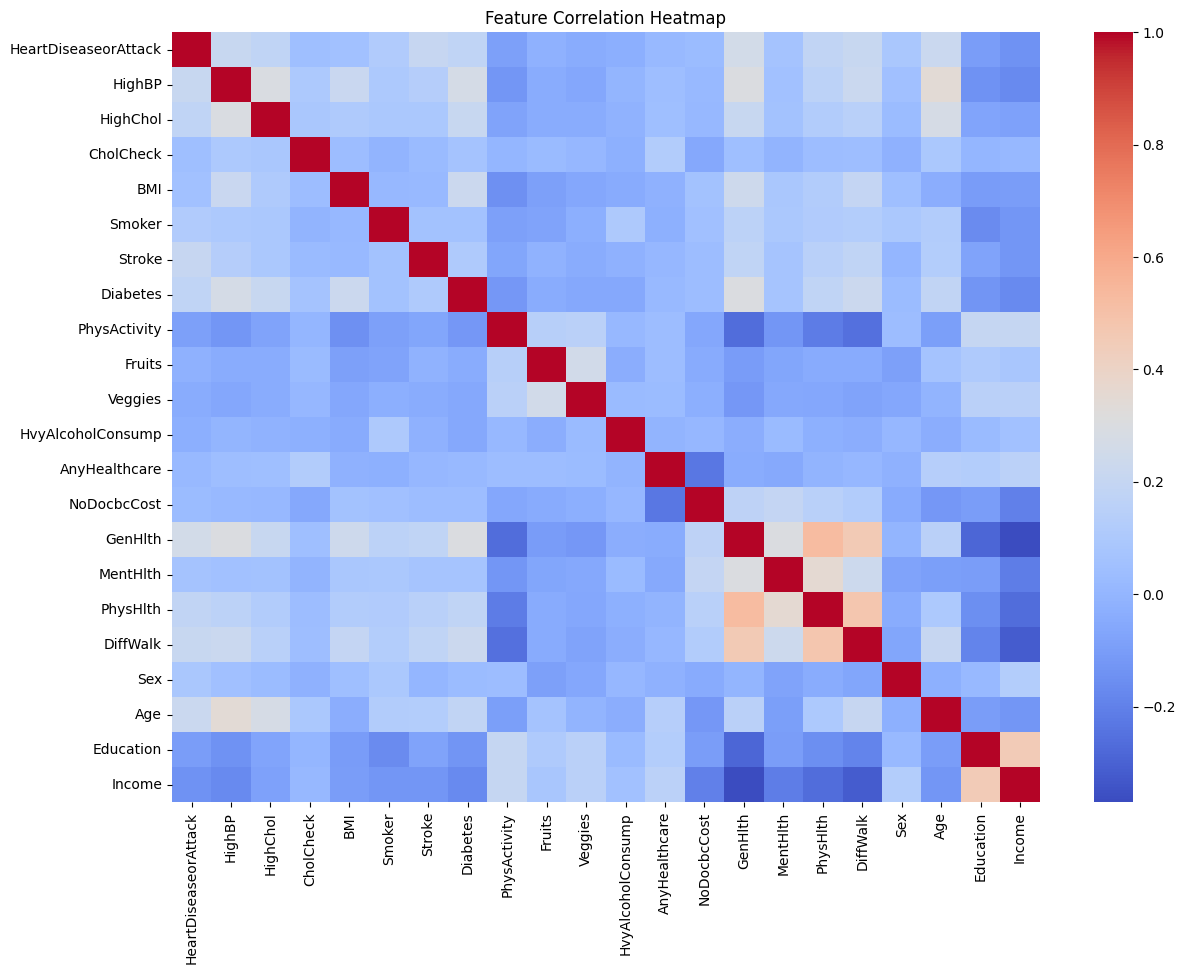

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Accuracy (Mean):", cv_scores.mean())


Cross-Validation Accuracy (Mean): 0.9029052349416586


In [30]:
#Hyperparameter tuning

In [31]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
X = df.drop(columns=["HeartDiseaseorAttack"])
y = df["HeartDiseaseorAttack"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [32]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)

In [33]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [34]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [35]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9079746136865342

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.64      0.05      0.09      4768

    accuracy                           0.91     50736
   macro avg       0.78      0.52      0.52     50736
weighted avg       0.88      0.91      0.87     50736

Confusion Matrix:
 [[45841   127]
 [ 4542   226]]


In [36]:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
print("Default Model Accuracy:", accuracy_score(y_test, y_pred_default))


Default Model Accuracy: 0.9036778618732261


In [37]:
import joblib

# Save the best model to a pickle file
joblib.dump(best_rf, "tuned_random_forest_model.pkl")
print("Model saved as tuned_random_forest_model.pkl")


Model saved as tuned_random_forest_model.pkl
